## Chapter 09-1 순차 데이터와 순환 신경망

In [ ]:
#순차 데이터 : 텍스트나 시계열 데이터와 같이 순서에 의미가 있는 데이터
#피드포워드 신경망 : 입력 데이터의 흐름이 앞으로만 전달되는 신경망 (합성곱, 완전 연결 신경망)
#순환 신경망 : 뉴런의 출력이 자기 자신에게 다시 전달됨. (순차 데이터)
#타임스텝 : 이전 샘플에 대한 기억을 가지고 있는 과정을 처리하는 한 단계
#셀 : 순환 신경망에서의 층, 뉴런을 모두 표시하지 않고 하나의 셀로 층을 표현
#은닉 상태 : 셀의 출력
#셀(순환층) -> 활성화 함수(일반적으로 탄젠트 함수) -> 은닉 상태
#순환 신경망의 뉴런은 입력과 가중치와 이전 타임스텝의 은닉 상태에 곱해지는 가중치 -> 현재 타입스텝의 은닉 상태
#순환층은 일반적으로 샘플마다 2개의 차원을 가진다.
#보통 하나의 샘플을 하나의 시퀀스라고 한다. 시퀀스의 길이는 타임스텝 길이이다.
#순환층은 기본적으로 마지막 타임스텝의 은닉 상태만 출력으로 내보낸다.

## Chapter 09-2 순환 신경망으로 IMDB 리뷰 분류하기

In [4]:
#토큰 : 분리된 단어 (NLP), 1개의 토큰은 하나의 타임스텝
from tensorflow.keras.datasets import imdb
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=300) #자주 등장하는 단어 300개만



In [2]:
print(train_input.shape, test_input.shape)
print(len(train_input[0])) #첫 번째 리뷰의 길이
print(len(train_input[1])) #두 번째 리뷰의 길이
print(train_input[0]) #첫 번째 리뷰에 담긴 내용
#어휘 사전에 없는 단어는 2로 표시됨.

(25000,) (25000,)
218
189
[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 2, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 2, 284, 5, 150, 4, 172, 112, 167, 2, 2, 2, 39, 4, 172, 2, 2, 17, 2, 38, 13, 2, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 2, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 2, 12, 8, 2, 8, 106, 5, 4, 2, 2, 16, 2, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 2, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 2, 26, 2, 2, 46, 7, 4, 2, 2, 13, 104, 88, 4, 2, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 2, 26, 2, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [3]:
print(train_target[:20]) #긍정 1 부정 0

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


In [4]:
from sklearn.model_selection import train_test_split
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

In [5]:
#각 리뷰의 길이를 계산해 저장 (리뷰의 길이 확인학 싶어서)
import numpy as np
lengths = np.array([len(x) for x in train_input])
print(np.mean(lengths), np.median(lengths))


239.00925 178.0


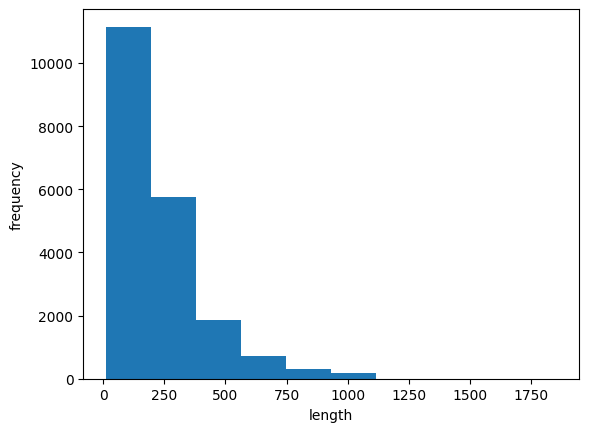

In [6]:
import matplotlib.pyplot as plt

plt.hist(lengths)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

In [7]:
#100개의 단어만 사용, 이 보다 작은 리뷰는 패딩으로 채움, 길면 잘름
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100)


In [8]:
print(train_seq.shape)

(20000, 100)


In [9]:
print(train_seq[0])

[ 10   4  20   9   2   2   2   5  45   6   2   2  33 269   8   2 142   2
   5   2  17  73  17 204   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12 215  69 224 142  73 237   6
   2   7   2   2 188   2 103  14  31  10  10   2   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10   2 158]


In [10]:
print(train_input[0][-10:])

[6, 2, 46, 7, 14, 20, 10, 10, 2, 158]


In [11]:
#샘플의 앞 부분이 잘렸다는 것을 짐작할 수 있음

#채워지는 것도 앞부분으로 0 
print(train_seq[5])


[  0   0   0   0   1   2 195  19  49   2   2 190   4   2   2   2 183  10
  10  13  82  79   4   2  36  71 269   8   2  25  19  49   7   4   2   2
   2   2   2  10  10  48  25  40   2  11   2   2  40   2   2   5   4   2
   2  95  14 238  56 129   2  10  10  21   2  94   2   2   2   2  11 190
  24   2   2   7  94 205   2  10  10  87   2  34  49   2   7   2   2   2
   2   2 290   2  46  48  64  18   4   2]


In [12]:
#검증 세트의 길이도 100
val_seq = pad_sequences(val_input, maxlen=100)


In [13]:
#RNN(순환신경망) 만들기
from tensorflow import keras
model = keras.Sequential()
#샘플 길이 100, 원-핫 인코딩 300개 단어
model.add(keras.layers.SimpleRNN(8, input_shape = (100,300)))
model.add(keras.layers.Dense(1, activation='sigmoid'))


In [14]:
#원-핫 인코딩
train_oh = keras.utils.to_categorical(train_seq)
print(train_oh.shape)

(20000, 100, 300)


In [15]:
print(train_oh[0][0][:12]) #첫 번째 샘플의 첫 번째 토큰 10

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [16]:
print(np.sum(train_oh[0][0]))

1.0


In [17]:
val_oh = keras.utils.to_categorical(val_seq)

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 8)                 2472      
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 2481 (9.69 KB)
Trainable params: 2481 (9.69 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
#순환 신경망 훈련하기
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.h5',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model.fit(train_oh, train_target, epochs=100, batch_size=64,
                    validation_data=(val_oh, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - ETA: 0s - loss: 0.6997 - accuracy: 0.4999

c:\Users\gudtj\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 35s 94ms/step - loss: 0.6997 - accuracy: 0.4999 - val_loss: 0.6958 - val_accuracy: 0.5140
Epoch 2/100
313/313 [==============================] - 16s 51ms/step - loss: 0.6967 - accuracy: 0.5059 - val_loss: 0.6940 - val_accuracy: 0.5226
Epoch 3/100
313/313 [==============================] - 12s 39ms/step - loss: 0.6944 - accuracy: 0.5101 - val_loss: 0.6925 - val_accuracy: 0.5266
Epoch 4/100
313/313 [==============================] - 17s 53ms/step - loss: 0.6925 - accuracy: 0.5153 - val_loss: 0.6912 - val_accuracy: 0.5330
Epoch 5/100
313/313 [==============================] - 15s 49ms/step - loss: 0.6909 - accuracy: 0.5238 - val_loss: 0.6900 - val_accuracy: 0.5402
Epoch 6/100
313/313 [==============================] - 13s 42ms/step - loss: 0.6893 - accuracy: 0.5316 - val_loss: 0.6886 - val_accuracy: 0.5460
Epoch 7/100
313/313 [==============================] - 15s 47ms/step - loss: 0.6876 - accuracy: 0.5397 - val_loss: 0.6872 - val_accuracy: 0.55

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [2]:
#원-핫 인코딩의 단점은 입력 데이터가 엄청 커진다는 것이다.
print(train_seq.nbytes, train_oh.nbytes)

NameError: name 'train_seq' is not defined

In [5]:
from tensorflow import keras
#단어 임베딩 : 각 단어를 고정된 크기의 실수 벡터로 변경
#입력으로 정수 데이터를 받아 train_seq 사용 가능
model2 = keras.Sequential()

model2.add(keras.layers.Embedding(300, 16, input_length=100))
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           4800      
                                                                 
 simple_rnn (SimpleRNN)      (None, 8)                 200       
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 5009 (19.57 KB)
Trainable params: 5009 (19.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy',
               metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-embedding-model.h5',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model2.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()
#성능은 비슷한데 속도는 단어 임베딩 > 원-핫 인코딩

## Chpater 09-3 LSTM과 GRU 셀

In [ ]:
#LSTM : 단기 기억을 오래 기억하기 위해 사용
#입력과 가중치를 곱하고 절편을 더해 활성화 함수를 통과시키는 구조 여러 개 보유
#은닉 상태는 입력과 이전 타입스텝의 은닉 상태를 가중치에 곱한 후 활성화 함수 통과
#활성화 함수는 시그모이드 함수 -> tanh 함수
#LSTM에는 순환되는 상태가, 은닉상태, 셀 상태 2개이다.
#셀 상태는 다음 층으로 전달되지 않고 LSTM 셀에서 순환만 되는 값
#셀 상태는 입력과 은닉 상태를 또 다른 가중치 W에 곱한 다음 시그모이드 함수 통과
#이후 이전 타임스텝의 셀 상태와 곱하여 새로운 셀 상태를 만든다.
#이 셀 상태가 오른쪽에서 tanh 함수를 통과하여 새로운 은닉 상태를 만드는 데 기여

#삭제 게이트 : 셀 상태에 있는 정보를 제거하는 역할
#입력 게이트 : 새로운 정보를 셀 상태에 추가
#출력 게이트 : 이 셀 상태가 다음 은닉 상태로 출력

In [6]:
# 실행마다 동일한 결과를 얻기 위해 케라스에 랜덤 시드를 사용하고 텐서플로 연산을 결정적으로 만듭니다.
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

In [7]:
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = imdb.load_data(
    num_words=500)

train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42)

In [8]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

In [9]:
from tensorflow import keras

model = keras.Sequential()

model.add(keras.layers.Embedding(500, 16, input_length=100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm (LSTM)                 (None, 8)                 800       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8809 (34.41 KB)
Trainable params: 8809 (34.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy',
              metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [10]:
#순환층에 드롭아웃 적용하기 (과대적합 제어)
model2 = keras.Sequential()

model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.LSTM(8, dropout=0.3))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy',
               metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-dropout-model.h5',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model2.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()
#검증 손실 약간 향상

In [11]:
#2개의 층을 연결
model3 = keras.Sequential()

model3.add(keras.layers.Embedding(500, 16, input_length=100))
#마지막을 제외한 순환층은 모든 타임스탭에 대한 은닉 상태를 출력
model3.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True))
#마지막 순환층은 마지막 타임스텝의 은닉 상태를 출력
model3.add(keras.layers.LSTM(8, dropout=0.3))
model3.add(keras.layers.Dense(1, activation='sigmoid'))

model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_2 (LSTM)               (None, 100, 8)            800       
                                                                 
 lstm_3 (LSTM)               (None, 8)                 544       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 9353 (36.54 KB)
Trainable params: 9353 (36.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model3.compile(optimizer=rmsprop, loss='binary_crossentropy',
               metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-2rnn-model.h5',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model3.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()
#과대적합을 제어하면서 손실을 최대한 낮춤

In [12]:
#GRU : LSTM 간소화 버전, 셀 상태를 계산하지 않고 은닉 상태 하나만 포함
#LSTM보다 계산량 적지만 성능은 비슷
model4 = keras.Sequential()

model4.add(keras.layers.Embedding(500, 16, input_length=100))
model4.add(keras.layers.GRU(8))
model4.add(keras.layers.Dense(1, activation='sigmoid'))

model4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 100, 16)           8000      
                                                                 
 gru (GRU)                   (None, 8)                 624       
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8633 (33.72 KB)
Trainable params: 8633 (33.72 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model4.compile(optimizer=rmsprop, loss='binary_crossentropy',
               metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-gru-model.h5',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model4.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [13]:
#테스트 세트 성능 계산
test_seq = pad_sequences(test_input, maxlen=100)

rnn_model = keras.models.load_model('best-2rnn-model.h5')

rnn_model.evaluate(test_seq, test_target)

OSError: No file or directory found at best-2rnn-model.h5